In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, mean_squared_error

In [55]:
df = pd.read_csv("data-logistic.csv", header=None)

In [13]:
df.head()

,0,1,2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750


In [14]:
target = df[0]

In [15]:
features = df.drop([0], axis=1)

In [27]:
features[1]

0     -0.663827
1      1.994596
2     -1.247395
3      2.309374
4      0.849143
         ...   
200    4.245176
201    2.437935
202   -1.876638
203   -6.824446
204    0.001805
Name: 1, Length: 205, dtype: float64

In [31]:
np.array(features[2])

array([-1.38525717e-01,  2.46802468e+00,  7.49424636e-01,  1.89983556e+00,
        2.40774982e+00, -6.65415709e-01,  2.26378585e+00,  1.46914110e+00,
       -8.24855578e-01,  2.03248761e+00,  4.95461855e-01,  4.19646539e-01,
       -1.15609708e+00, -1.08066154e+00,  1.78543356e+00, -6.45619241e-01,
       -1.05974659e+00,  1.74588676e+00,  1.12963766e+00,  2.14283780e+00,
       -6.06776832e-01, -4.57305579e+00, -1.07628156e+00, -7.34473331e-01,
        1.67920518e-01,  6.67507237e-02,  2.55000484e+00,  3.26080036e+00,
        3.18888673e-01,  1.23462070e+00, -4.36249303e-01,  1.00717622e+00,
        3.55385229e+00,  1.38557248e+00,  1.43528079e+00, -7.04410753e-01,
        3.22612345e+00,  1.47147780e+00, -2.99608481e-01,  8.41576592e-01,
        8.09009518e-01,  7.70091530e-01,  8.16012683e-01, -9.33380505e-01,
        1.02713852e+00,  1.33935081e+00,  2.28541783e+00,  5.40855726e-03,
        1.01057811e-01,  2.27389350e+00,  8.41476527e-01,  2.92917715e+00,
       -4.89676381e-01,  

In [33]:
np.array(target).as

array([-1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,
        1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
        1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
        1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1], dtype=int64)

In [34]:
def fff(x, y):
    for x1, x2, y in zip(np.array(x[1]), np.array(x[2]), y):
        print(x1, x2, y)

In [35]:
fff(features, target)

-0.6638265368249999 -0.138525716794 -1
1.9945955012799998 2.46802467614 1
-1.24739491636 0.749424636303 -1
2.30937424866 1.89983555937 1
0.849143314149 2.40774982339 1
1.4542709504 -0.6654157090030001 1
2.25422743269 2.2637858535 1
-0.06757951660559999 1.46914109556 -1
-0.861960913075 -0.824855578346 -1
0.699178929108 2.03248760563 1
-0.16147996103599999 0.495461854788 -1
-0.14710226136600002 0.41964653929300005 -1
0.0802959559549 -1.1560970761 -1
1.72065543353 -1.08066154412 -1
1.57395764659 1.7854335648 1
1.16844517782 -0.645619241065 -1
-0.06662736015 -1.05974658502 -1
1.1633547323 1.7458867561099998 1
2.0969697873400004 1.1296376586599999 1
3.03570513408 2.14283779581 1
0.831852058628 -0.606776832016 -1
-12.977800215 -4.57305579231 1
-0.842603085438 -1.07628156079 -1
-0.47353672342299996 -0.734473330818 -1
1.5403731257100002 0.16792051752099998 -1
0.495341113263 0.0667507236575 -1
2.0914860395 2.55000483607 1
2.9370546100999997 3.2608003644599997 1
-0.501666814497 0.318888672551 -1

In [19]:
np.array(target)

array([-1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,
        1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
        1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
        1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1], dtype=int64)

In [20]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get("https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/hrIFu8eQEeWoXw5ZvVCRuw_1a61e227f5a1bc7fc0354df00fa70781_logderiv.png?expiry=1606435200000&hmac=H3ZYU9fYIt0Tv2yoAhHacyIaD_DBuXMuFZ4CG9q5CDk")
img = Image.open(BytesIO(response.content))

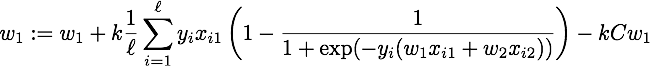

In [23]:
img

In [98]:
def sigmoid_1(weights, x, y):
    z = (-y) * np.dot(weights, x)
    sigm = 1 / ( 1 + np.exp(z))
    return sigm

def gradient_descent(df, k=0.1, C=0, eps=1e-5, iterations=100000):
    w1 = 0
    w2 = 0
    w = np.array((w1, w2))
    for i in range(iterations):
        sum1 = sum2 = 0
        for index, row in df.iterrows():
            x1, x2, y = row[1], row[2], row[0]
            sum1 += y * x1 * ( 1 - sigmoid_1(w, np.array((x1, x2)), y) )
            sum2 += y * x2 * ( 1 - sigmoid_1(w, np.array((x1, x2)), y) )
        w1 = w1 + k * (1 / len(df)) * sum1 - k * C * w1
        w2 = w2 + k * (1 / len(df)) * sum2 - k * C * w2
        
        new_w = np.array((w1, w2))
        error = ((w[0] - new_w[0])**2 + (w[1] - new_w[1])**2)**(.5)
        if error < eps:
            break
        w = new_w
    return w

def get_roc_auc(df, weights):
    
    x1 = np.array(df[1])
    x2 = np.array(df[2])
    y = np.array(df[0])
    
    prediction_proba = sigmoid_1(weights, np.array((x1, x2)), 1)
    return roc_auc_score(y, prediction_proba)

### Without regularization

In [99]:
w_c0 = gradient_descent(df)

In [100]:
get_roc_auc(df, w_c0)

0.9268571428571428

### With regularization

In [101]:
w_c10 = gradient_descent(df, C=10)

In [102]:
get_roc_auc(df, w_c10)

0.9362857142857142